# Installing the libraries that usually need installing and don't come pre-installed.

In [ ]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 400.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 47.0 MB/s eta 0:00:00
   ━━━

In [ ]:
# pip install scikit-learn

In [ ]:
# pip install tensorflow

In [ ]:
# pip install keras

In [ ]:
pip install xgboost

# Importing the necessary libraries for this notebook.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pycaret.regression import *
from pycaret.regression import create_model, tune_model, evaluate_model, get_config
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import xgboost as xgb
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from tensorflow.keras import layers, models, regularizers, callbacks
import timeit

# Reading the Top 10 Companies data.

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/Milestone II/Top_10_NASDAQ.csv")
df1

,Date,Open,High,Low,Close,Adj Close,Volume,garman_klass_vol,rsi,bb_low,bb_mid,bb_high,atr,macd,dollar_volume,Ticker_numeric,Company_Name_numeric
0,2023-12-29,376.00,377.16,373.48,376.04,374.00,18723000,0.000037,NaN,NaN,NaN,NaN,NaN,NaN,7002.402000,28,29
1,2023-12-28,375.37,376.46,374.16,375.28,373.24,14327000,0.000006,NaN,NaN,NaN,NaN,NaN,NaN,5347.409480,28,29
2,2023-12-27,373.69,375.06,372.81,374.07,372.04,14905400,0.000011,NaN,NaN,NaN,NaN,NaN,NaN,5545.405016,28,29
3,2023-12-26,375.00,376.94,373.50,374.66,372.62,12673100,0.000026,NaN,NaN,NaN,NaN,NaN,NaN,4722.250522,28,29
4,2023-12-22,373.68,375.18,372.71,374.58,372.54,17091100,0.000018,NaN,NaN,NaN,NaN,NaN,NaN,6367.118394,28,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53683,2012-05-24,32.95,33.21,31.77,33.03,32.93,50237200,0.000982,62.650704,3.248486,3.394003,3.539520,0.194881,0.333104,1654.310996,26,26
53684,2012-05-23,31.37,32.50,31.36,32.00,31.90,73600000,0.000529,59.160371,3.248081,3.394247,3.540412,0.193104,0.512131,2347.840000,26,26
53685,2012-05-22,32.61,33.59,30.94,31.00,30.91,101786600,0.002269,56.003681,3.249164,3.393315,3.537467,0.194311,0.567584,3146.223806,26,26
53686,2012-05-21,36.53,36.66,33.00,34.03,33.93,168192700,0.003425,62.439205,3.241641,3.396446,3.551250,0.194717,0.845473,5706.778311,26,26


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Dropping NA values.

In [ ]:
df1.dropna(inplace=True)
df1

,Date,Open,High,Low,Close,Adj Close,Volume,garman_klass_vol,rsi,bb_low,bb_mid,bb_high,atr,macd,dollar_volume,Ticker_numeric,Company_Name_numeric,COVID_Impact
25,2023-11-22,378.00,379.79,374.97,377.85,375.80,23345300,0.000068,53.856228,5.899463,5.921131,5.942798,14.154920,2.310112,8773.163740,28,29,0
26,2023-11-21,375.67,376.22,371.12,373.07,371.04,28423100,0.000034,47.581805,5.900131,5.921459,5.942786,14.032450,1.874908,10546.107024,28,29,0
27,2023-11-20,371.22,378.87,371.00,377.44,375.39,52465100,0.000172,52.864381,5.900342,5.922014,5.943687,13.674604,1.859577,19694.873889,28,29,0
28,2023-11-17,373.61,374.37,367.00,369.85,367.84,40157000,0.000104,44.644496,5.899439,5.921639,5.943839,13.838413,1.224096,14771.350880,28,29,0
29,2023-11-16,370.96,376.35,370.18,376.17,374.13,27182300,0.000109,51.286943,5.900431,5.922366,5.944302,13.781135,1.214028,10169.713899,28,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53683,2012-05-24,32.95,33.21,31.77,33.03,32.93,50237200,0.000982,62.650704,3.248486,3.394003,3.539520,0.194881,0.333104,1654.310996,26,26,0
53684,2012-05-23,31.37,32.50,31.36,32.00,31.90,73600000,0.000529,59.160371,3.248081,3.394247,3.540412,0.193104,0.512131,2347.840000,26,26,0
53685,2012-05-22,32.61,33.59,30.94,31.00,30.91,101786600,0.002269,56.003681,3.249164,3.393315,3.537467,0.194311,0.567584,3146.223806,26,26,0
53686,2012-05-21,36.53,36.66,33.00,34.03,33.93,168192700,0.003425,62.439205,3.241641,3.396446,3.551250,0.194717,0.845473,5706.778311,26,26,0


# Converting date column to datetime format and defining train and test dates.

In [ ]:
# Ensure that 'Date' column is in datetime format
df1['Date'] = pd.to_datetime(df1['Date'])

# Define train and test date ranges
train_start_date = pd.to_datetime('2010-01-01')
train_end_date = pd.to_datetime('2015-01-01')

test_start_date = pd.to_datetime('2015-01-01')
test_end_date = pd.to_datetime('2016-01-01')

# Initial plot of close values of companies.

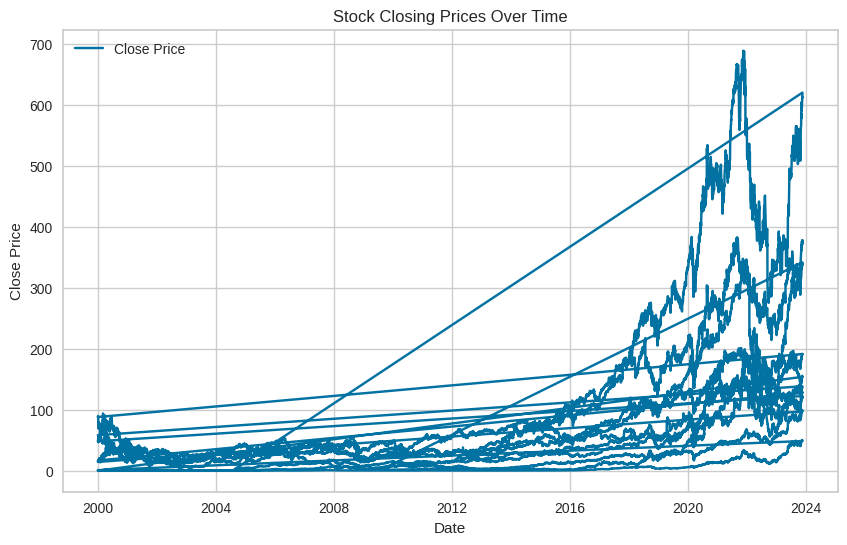

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df1['Date'], df1['Close'], label='Close Price')
plt.title('Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Defining train and test data.

In [ ]:
# Split train data
train_data = df1[(df1['Date'] >= train_start_date) & (df1['Date'] < train_end_date)]

# Split test data
test_data = df1[(df1['Date'] >= test_start_date) & (df1['Date'] < test_end_date)]

# Check the result
print("Training data:", train_data.shape)
print("Test data:", test_data.shape)

Training data: (11981, 17)
Test data: (2519, 17)


# Linear regression.

In [ ]:
# Define the features (e.g., Open, High, Low) and target (e.g., Close)
X_train = train_data[['Open', 'High', 'Low', 'Volume',
       'garman_klass_vol', 'rsi', 'bb_low', 'bb_mid', 'bb_high', 'atr', 'macd',
       'dollar_volume', 'Ticker_numeric', 'Company_Name_numeric']]

#X_train = train_data[['Open', 'macd','Low', 'Volume','garman_klass_vol','rsi','atr','bb_low', 'bb_mid', 'bb_high','High']]
print(X_train.head())
y_train = train_data['Close']  # Target variable for training

X_test = test_data[['Open', 'High', 'Low', 'Volume',
       'garman_klass_vol', 'rsi', 'bb_low', 'bb_mid', 'bb_high', 'atr', 'macd',
       'dollar_volume', 'Ticker_numeric', 'Company_Name_numeric']]
y_test = test_data['Close']  # Target variable for testing

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate and display the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

       Open   High    Low    Volume  garman_klass_vol        rsi    bb_low  \
2264  46.73  47.44  46.45  21552500         -0.009210  56.692060  3.623065   
2265  47.44  47.62  46.84  16384700         -0.009648  58.767955  3.638353   
2266  47.70  47.78  47.26  14439500         -0.009283  60.281223  3.666788   
2267  48.41  48.41  47.82  13197800         -0.009971  61.758599  3.689970   
2268  48.64  48.64  48.08  11437800         -0.009907  62.628624  3.688046   

        bb_mid   bb_high       atr      macd  dollar_volume  Ticker_numeric  \
2264  3.698663  3.774261  1.891935  0.695051     861.453425              28   
2265  3.704151  3.769949  1.839654  0.699045     662.924962              28   
2266  3.711048  3.755308  1.815393  0.723723     589.564785              28   
2267  3.716673  3.743376  1.760008  0.764326     543.749360              28   
2268  3.717830  3.747613  1.674293  0.804978     473.753676              28   

      Company_Name_numeric  
2264                    29 

# R-squared value for the Linear Regression model.

In [ ]:
# Predict on the test data
y_pred = model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print(f'R-squared: {r2}')

R-squared: 0.9998877734601661


# Plotting values for the top 10 companies.

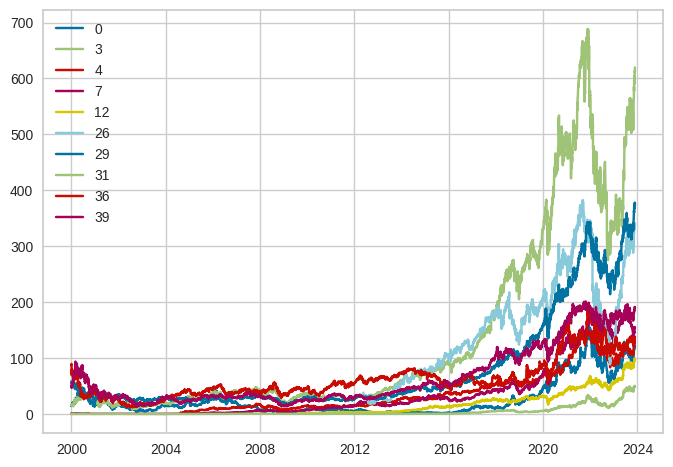

In [ ]:
company_groups = df1.groupby('Company_Name_numeric')
for company_name, group in company_groups:
    plt.plot(group['Date'], group['Close'], label=company_name)
plt.legend()
plt.show()

# Linear regression using cross validation.

In [ ]:
# Initialize your model
model = LinearRegression()

# Set up the KFold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and calculate MSE
cross_val_mse = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

# Calculate the average cross-validated MSE
avg_mse = np.mean(-cross_val_mse)
print(f"Average Cross-Validated MSE: {avg_mse}")

# Fit the model on the entire training data
model.fit(X_train, y_train)

# Evaluate the model on a separate test set
y_pred_test = model.predict(X_test)

# Calculate MSE and R-squared for the test set
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Test Set MSE: {mse_test}")
print(f"Test Set R-squared: {r2_test}")

# Check for overfitting by comparing cross-validated MSE with test set MSE
if mse_test > avg_mse:
    print("The model may be overfitting as the test set error is higher than the cross-validated error.")
else:
    print("The model generalizes well as the test set error is similar to the cross-validated error.")

Average Cross-Validated MSE: 0.034290451640831124
Test Set MSE: 0.10065547850077301
Test Set R-squared: 0.9998877734601661
The model may be overfitting as the test set error is higher than the cross-validated error.


In [ ]:
from sklearn.feature_selection import RFE
selector = RFE(model, n_features_to_select=5)
selector = selector.fit(X_train, y_train)
X_train_selected = selector.transform(X_train)

# Pycaret Initiallisation.

In [ ]:
regression_setup = setup(data=df1, target='Close', session_id=123)

,Description,Value
0,Session id,123
1,Target,Close
2,Target type,Regression
3,Original data shape,"(53688, 18)"
4,Transformed data shape,"(53688, 20)"
5,Transformed train set shape,"(37581, 20)"
6,Transformed test set shape,"(16107, 20)"
7,Numeric features,16
8,Date features,1
9,Rows with missing values,0.7%


# Pycaret comparing models.

In [ ]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.2682,0.3137,0.5597,1.0000,0.0076,0.0062,64.6950
et,Extra Trees Regressor,0.2640,0.2782,0.5271,1.0000,0.0076,0.0063,23.3710
lr,Linear Regression,0.3714,0.5808,0.7603,0.9999,0.0253,0.0362,0.7120
ridge,Ridge Regression,0.3704,0.5808,0.7603,0.9999,0.0258,0.0376,0.1980
lar,Least Angle Regression,0.3648,0.6622,0.8103,0.9999,0.0193,0.0277,0.1120
llar,Lasso Least Angle Regression,0.4677,0.9244,0.9610,0.9999,0.0453,0.0701,0.1100
br,Bayesian Ridge,0.3709,0.5808,0.7602,0.9999,0.0255,0.0368,0.2220
dt,Decision Tree Regressor,0.3597,0.6127,0.7816,0.9999,0.0107,0.0079,1.0930
gbr,Gradient Boosting Regressor,0.6482,1.2022,1.0958,0.9998,0.0290,0.0454,22.5730
en,Elastic Net,0.6850,2.1131,1.4531,0.9997,0.0659,0.1043,0.6380


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
# Train the Random Forest Regressor
rf_model = create_model('rf')

# Train the Extra Trees Regressor
et_model = create_model('et')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,14:43:10
Status,. . . . . . . . . . . . . . . . . .,Finalizing Model
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Regressor


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2707,0.2980,0.5459,1.0000,0.0071,0.0060
1,0.2651,0.2850,0.5339,1.0000,0.0072,0.0061
2,0.2671,0.2990,0.5468,1.0000,0.0079,0.0063
3,0.2578,0.2991,0.5469,1.0000,0.0076,0.0062
4,0.2835,0.3353,0.5790,1.0000,0.0074,0.0062
5,0.2672,0.3173,0.5633,1.0000,0.0080,0.0064
6,0.2784,0.3722,0.6101,1.0000,0.0079,0.0064
7,0.2711,0.3288,0.5734,1.0000,0.0078,0.0061
8,0.2566,0.2923,0.5406,1.0000,0.0076,0.0061


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2666,0.2689,0.5185,1.0000,0.0072,0.0061
1,0.2558,0.2441,0.4941,1.0000,0.0073,0.0061
2,0.2622,0.2796,0.5287,1.0000,0.0077,0.0063
3,0.2534,0.2487,0.4987,1.0000,0.0077,0.0063
4,0.2766,0.2893,0.5379,1.0000,0.0076,0.0062
5,0.2670,0.2750,0.5244,1.0000,0.0081,0.0066
6,0.2726,0.3016,0.5492,1.0000,0.0076,0.0064
7,0.2692,0.3183,0.5642,1.0000,0.0078,0.0062
8,0.2566,0.2824,0.5314,1.0000,0.0077,0.0063


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

# Plotting pycaret results.

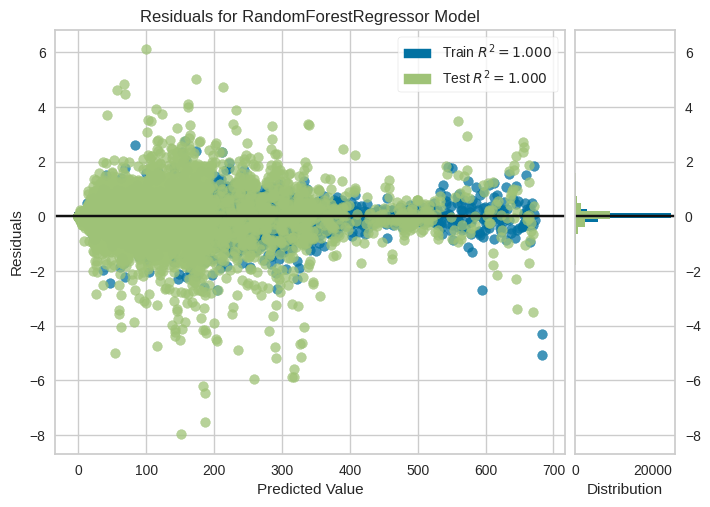

In [ ]:
plot_model (best_model, plot='residuals')

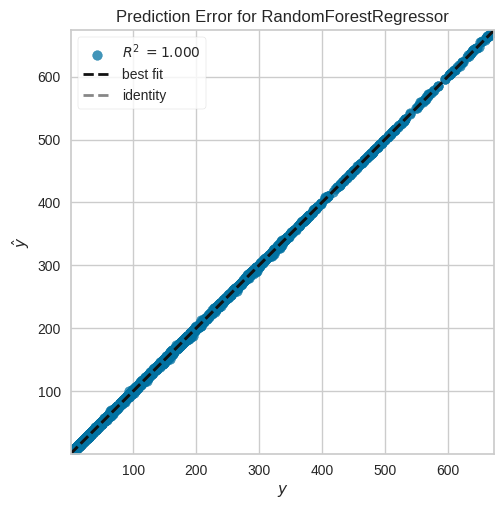

In [ ]:
plot_model (best_model, plot='error')

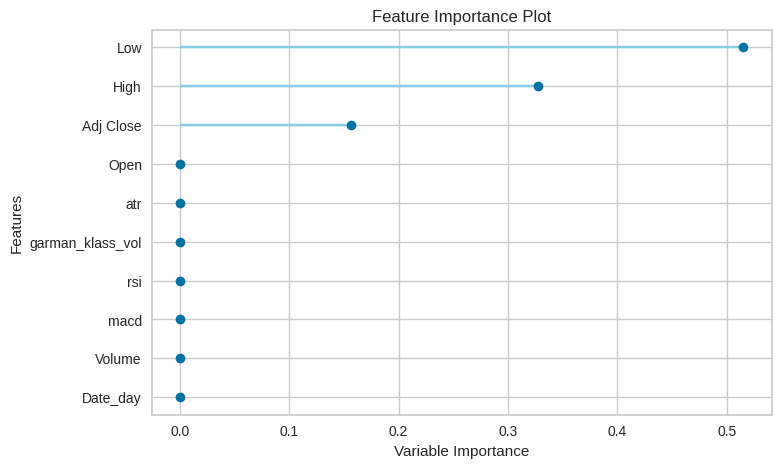

In [ ]:
plot_model (best_model, plot='feature')

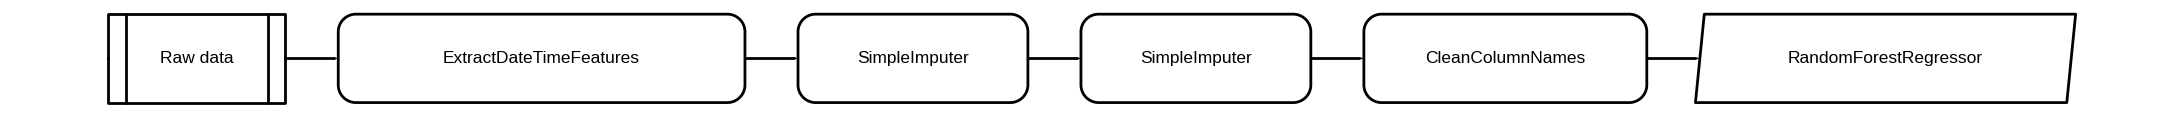

In [ ]:
evaluate_model(best_model)

In [ ]:
holdout_pred=predict_model(best_model)
holdout_pred.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.2626,0.2970,0.5450,1.0000,0.0076,0.0062


,Date,Open,High,Low,Adj Close,Volume,garman_klass_vol,rsi,bb_low,bb_mid,bb_high,atr,macd,dollar_volume,Ticker_numeric,Company_Name_numeric,COVID_Impact,Close,prediction_label
47895,2020-12-29,43.580002,43.580002,42.680000,39.049999,9593000,-0.004436,40.690517,3.670855,3.729709,3.788563,1.455914,-0.849637,374.606659,9,12,1,42.900002,43.0276
29472,2022-03-23,26.129999,26.610001,25.580000,25.600000,502120000,0.000617,58.743702,3.039332,3.246396,3.453459,1.272672,2.088299,12854.272461,30,31,0,25.629999,26.0423
47489,2022-08-10,54.610001,55.099998,53.919998,52.360001,19519000,-0.000450,58.952568,3.853840,3.937882,4.021925,0.838729,1.492279,1022.014832,9,12,0,55.040001,54.5009
31039,2015-12-31,0.830000,0.840000,0.820000,0.800000,148528000,-0.000233,61.830673,0.490825,0.539983,0.589142,0.770638,0.020012,118.822403,30,31,0,0.820000,0.8287
39553,2006-03-02,32.000000,32.840000,31.860001,21.030001,21858000,-0.067614,53.612461,3.007603,3.052661,3.097719,0.566328,-0.079570,459.673737,39,39,0,32.349998,32.5491


# Deep learning model using MLP regressor.

In [ ]:

# Load data (ensure your data is correctly loaded here)
df1 = pd.read_csv("/content/drive/MyDrive/Milestone II/Top_10_NASDAQ.csv")
df1['Date'] = pd.to_datetime(df1['Date'])
df1.dropna(inplace=True)

# Define training and testing date ranges
train_start_date = pd.to_datetime('2005-01-01')
train_end_date = pd.to_datetime('2019-01-01')
test_start_date = pd.to_datetime('2019-01-01')
test_end_date = pd.to_datetime('2022-01-01')

# Split data into training and testing sets
train_data = df1[(df1['Date'] >= train_start_date) & (df1['Date'] < train_end_date)]
test_data = df1[(df1['Date'] >= test_start_date) & (df1['Date'] < test_end_date)]

# Define features and target variable
features = ['Open', 'High', 'Low', 'Volume', 'garman_klass_vol', 'rsi', 'bb_low', 'bb_mid',
            'bb_high', 'atr', 'macd', 'dollar_volume', 'Ticker_numeric', 'Company_Name_numeric']
X_train = train_data[features]
y_train = train_data['Close']
X_test = test_data[features]
y_test = test_data['Close']

# Get training and test data from PyCaret
#X_train = get_config('X_train')
#X_test = get_config('X_test')
#y_train = get_config('y_train')
#y_test = get_config('y_test')

# Function to process datetime and string columns
def preprocess_data(X):
    # Convert datetime columns to timestamps
    for col in X.columns:
        if pd.api.types.is_datetime64_any_dtype(X[col]):
            X[col] = X[col].apply(lambda x: x.timestamp())  # Convert datetime to timestamp

    # One-hot encode categorical string columns
    X = pd.get_dummies(X, drop_first=True)
    return X

# Preprocess both training and testing datasets
X_train = preprocess_data(X_train)
X_test = preprocess_data(X_test)

# Ensure columns align between train and test sets
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# MLP Regressor using scikit-learn
mlp_regressor = MLPRegressor(hidden_layer_sizes=(100, 100), activation='relu', solver='adam', max_iter=1000, random_state=42)
mlp_regressor.fit(X_train_scaled, y_train)

# Predict and evaluate the model
y_pred_mlp = mlp_regressor.predict(X_test_scaled)
mlp_mse = mean_squared_error(y_test, y_pred_mlp)
print(f'MLP Regressor MSE: {mlp_mse}')

MLP Regressor MSE: 19.830914891663177


# Hyperparamter tuning the MLP regressor.

In [ ]:
# Try different hyperparameters for the MLP Regressor
mlp_tuned = MLPRegressor(hidden_layer_sizes=(200, 100), activation='tanh', solver='adam', max_iter=2000, random_state=42)
mlp_tuned.fit(X_train_scaled, y_train)

# Predict and evaluate the tuned MLP model
y_pred_mlp_tuned = mlp_tuned.predict(X_test_scaled)
mlp_tuned_mse = mean_squared_error(y_test, y_pred_mlp_tuned)
print(f'Tuned MLP Regressor MSE: {mlp_tuned_mse}')

Tuned MLP Regressor MSE: 5039.563813264274


# Deeper tuning for MLP regressor.

In [ ]:
# Define a deeper model for tuning
model_tuned = tf.keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

# Compile the tuned model
model_tuned.compile(optimizer='adam', loss='mse')

# Train the tuned model
history_tuned = model_tuned.fit(X_train_scaled, y_train, epochs=150, validation_split=0.2, verbose=0)

# Predict and evaluate the tuned deep learning model
y_pred_dl_tuned = model_tuned.predict(X_test_scaled)
dl_tuned_mse = mean_squared_error(y_test, y_pred_dl_tuned)
print(f'Tuned Deep Learning Regressor MSE: {dl_tuned_mse}')

236/236 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Tuned Deep Learning Regressor MSE: 15.52334122718943


# Cross validation for the MLP regressor.

In [ ]:
# Define the model
mlp_regressor = MLPRegressor(hidden_layer_sizes=(100, 100), activation='relu', solver='adam', max_iter=1000, random_state=42)

# K-Fold Cross-Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Using 'neg_mean_squared_error' to evaluate the model, as cross_val_score returns negative MSE to maximize it
scores = cross_val_score(mlp_regressor, X_train_scaled, y_train, cv=kfold, scoring='neg_mean_squared_error')

# Convert negative scores to positive and calculate average MSE
mse_scores = -scores
mean_mse = mse_scores.mean()

print(f"MSE scores for each fold: {mse_scores}")
print(f"Mean MSE from cross-validation: {mean_mse}")

MSE scores for each fold: [0.17299539 0.15187873 0.2236662  0.16952281 0.15737159]
Mean MSE from cross-validation: 0.1750869442555633


# Deeper model tuning for MLP regressor.

In [ ]:
# Define a deeper model for tuning with regularization and dropout
model_improved = tf.keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],),
                 kernel_regularizer=regularizers.l2(0.01)),  # L2 Regularization
    layers.Dropout(0.3),  # Dropout layer with 30% rate
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.3),  # Dropout layer with 30% rate
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.3),  # Dropout layer with 30% rate
    layers.Dense(1)
])

# Compile the improved model
model_improved.compile(optimizer='adam', loss='mse')

# Train the improved model
history_improved = model_improved.fit(X_train_scaled, y_train, epochs=150, validation_split=0.2, verbose=0)

# Predict and evaluate the improved deep learning model
y_pred_dl_improved = model_improved.predict(X_test_scaled)
dl_improved_mse = mean_squared_error(y_test, y_pred_dl_improved)
print(f'Improved Deep Learning Regressor MSE: {dl_improved_mse}')


236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Improved Deep Learning Regressor MSE: 3216.9090382297704


# MLP regressor updated model with reduced regularization and dropout rates.

236/236 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Updated Deep Learning Regressor MSE: 8.31293450207959


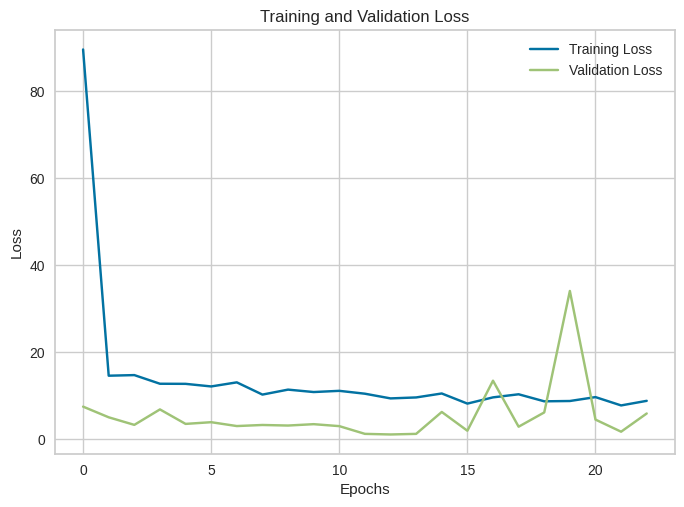

In [ ]:
# Define an updated model with reduced regularization and dropout rates
model_updated = tf.keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],),
                 kernel_regularizer=regularizers.l2(0.001)),  # Reduced L2 Regularization
    layers.Dropout(0.2),  # Reduced Dropout layer with 20% rate
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.2),  # Reduced Dropout layer with 20% rate
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1)
])

# Compile the updated model
model_updated.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')

# Define early stopping callback
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the updated model
history_updated = model_updated.fit(X_train_scaled, y_train, epochs=150, validation_split=0.2,
                                    callbacks=[early_stopping], verbose=0)

# Predict and evaluate the updated deep learning model
y_pred_dl_updated = model_updated.predict(X_test_scaled)
dl_updated_mse = mean_squared_error(y_test, y_pred_dl_updated)
print(f'Updated Deep Learning Regressor MSE: {dl_updated_mse}')

# Plot training and validation loss
plt.plot(history_updated.history['loss'], label='Training Loss')
plt.plot(history_updated.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Further Improved Deep Learning Regressor MSE: 85.03355777754571


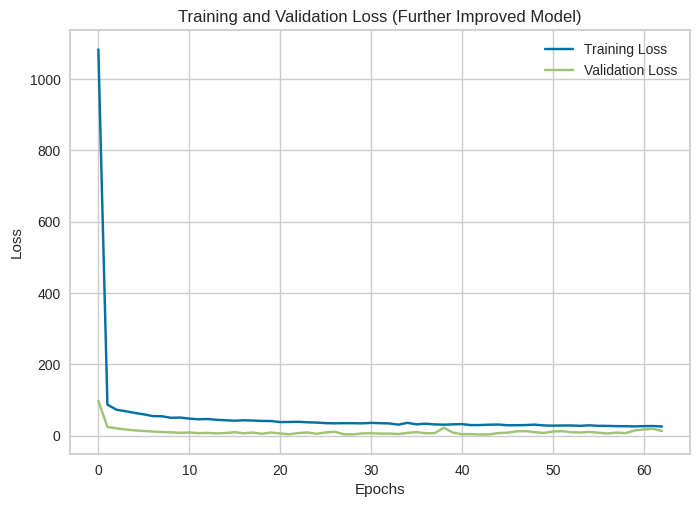

In [ ]:
# Define an updated model with reduced complexity and increased dropout rate
model_further_improved = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],),
                 kernel_regularizer=regularizers.l2(0.001)),  # L2 Regularization
    layers.Dropout(0.4),  # Increased Dropout layer with 40% rate
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.4),  # Increased Dropout layer with 40% rate
    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1)
])

# Compile the improved model
model_further_improved.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='mse')

# Define early stopping callback with increased patience
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Train the further improved model
history_further_improved = model_further_improved.fit(X_train_scaled, y_train, epochs=200, validation_split=0.2,
                                                      callbacks=[early_stopping], verbose=0)

# Predict and evaluate the further improved deep learning model
y_pred_dl_further_improved = model_further_improved.predict(X_test_scaled)
dl_further_improved_mse = mean_squared_error(y_test, y_pred_dl_further_improved)
print(f'Further Improved Deep Learning Regressor MSE: {dl_further_improved_mse}')

# Plot training and validation loss
plt.plot(history_further_improved.history['loss'], label='Training Loss')
plt.plot(history_further_improved.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss (Further Improved Model)')
plt.show()


X_train_scaled shape: (3523, 14)
X_test_scaled shape: (757, 14)
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Further Improved Deep Learning Regressor MSE: 9022.703587145745


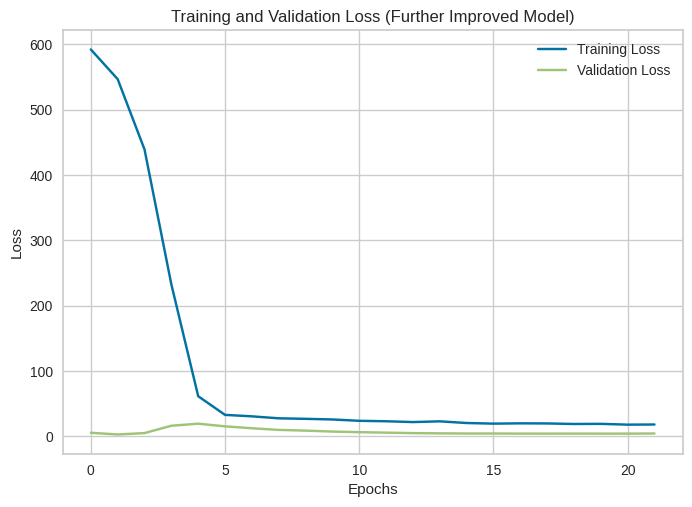

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras import layers, regularizers, callbacks
import matplotlib.pyplot as plt

# Load data (ensure your data is correctly loaded here)
df1 = pd.read_csv("/content/drive/MyDrive/Milestone II/Top_10_NASDAQ.csv")
df1['Date'] = pd.to_datetime(df1['Date'])

# Filter data for the company with ticker_numeric = 0
df_company = df1[df1['Ticker_numeric'] == 0]

# Define training and testing date ranges
train_start_date = pd.to_datetime('2005-01-01')
train_end_date = pd.to_datetime('2019-01-01')
test_start_date = pd.to_datetime('2019-01-01')
test_end_date = pd.to_datetime('2022-01-01')

# Split data into training and testing sets
train_data = df_company[(df_company['Date'] >= train_start_date) & (df_company['Date'] < train_end_date)]
test_data = df_company[(df_company['Date'] >= test_start_date) & (df_company['Date'] < test_end_date)]

# Define features and target variable
features = ['Open', 'High', 'Low', 'Volume', 'garman_klass_vol', 'rsi', 'bb_low', 'bb_mid',
            'bb_high', 'atr', 'macd', 'dollar_volume', 'Ticker_numeric', 'Company_Name_numeric']
X_train = train_data[features]
y_train = train_data['Close']
X_test = test_data[features]
y_test = test_data['Close']

# Function to preprocess data (converting datetimes and handling categorical variables)
def preprocess_data(X):
    # Convert datetime columns to timestamps
    for col in X.columns:
        if pd.api.types.is_datetime64_any_dtype(X[col]):
            X[col] = X[col].apply(lambda x: x.timestamp())

    # One-hot encode categorical string columns
    X = pd.get_dummies(X, drop_first=True)
    return X

# Preprocess both training and testing datasets
X_train = preprocess_data(X_train)
X_test = preprocess_data(X_test)

# Ensure columns align between train and test sets
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled data to NumPy arrays (if not already)
X_train_scaled = np.array(X_train_scaled)
X_test_scaled = np.array(X_test_scaled)

# Print shapes for verification
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

# Define the updated model with reduced complexity and increased dropout rate
model_further_improved = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],),
                 kernel_regularizer=regularizers.l2(0.001)),  # L2 Regularization
    layers.Dropout(0.4),  # Increased Dropout layer with 40% rate
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.4),  # Increased Dropout layer with 40% rate
    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1)
])

# Compile the improved model
model_further_improved.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='mse')

# Define early stopping callback with increased patience
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Train the further improved model
history_further_improved = model_further_improved.fit(X_train_scaled, y_train, epochs=200, validation_split=0.2,
                                                      callbacks=[early_stopping], verbose=0)
y_pred_dl_further_improved = model_further_improved.predict(X_test_scaled)
dl_further_improved_mse = mean_squared_error(y_test, y_pred_dl_further_improved)
print(f'Further Improved Deep Learning Regressor MSE: {dl_further_improved_mse}')

# Plot training and validation loss
plt.plot(history_further_improved.history['loss'], label='Training Loss')
plt.plot(history_further_improved.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss (Further Improved Model)')
plt.show()


# Using the MLP to predict for 1 company (Apple)

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/Milestone II/Top_10_NASDAQ.csv")
df1['Date'] = pd.to_datetime(df1['Date'])
# Filter data for the company with ticker_numeric = 0
df_company = df1[df1['Ticker_numeric'] == 0]

train_start_date = pd.to_datetime('2005-01-01')
train_end_date = pd.to_datetime('2019-01-01')

test_start_date = pd.to_datetime('2019-01-01')
test_end_date = pd.to_datetime('2022-01-01')

train_data = df_company[(df_company['Date'] >= train_start_date) & (df_company['Date'] < train_end_date)]
test_data = df_company[(df_company['Date'] >= test_start_date) & (df_company['Date'] < test_end_date)]

# Define the features (e.g., Open, High, Low) and target (e.g., Close)
X_train = train_data[['Open', 'High', 'Low', 'Volume',
       'garman_klass_vol', 'rsi', 'bb_low', 'bb_mid', 'bb_high', 'atr', 'macd',
       'dollar_volume', 'Ticker_numeric', 'Company_Name_numeric']]  # Example features
y_train = train_data['Close']  # Target variable for training

X_test = test_data[['Open', 'High', 'Low', 'Volume',
       'garman_klass_vol', 'rsi', 'bb_low', 'bb_mid', 'bb_high', 'atr', 'macd',
       'dollar_volume', 'Ticker_numeric', 'Company_Name_numeric']]  # Example features
y_test = test_data['Close']  # Target variable for testing

# Function to process datetime and string columns
def preprocess_data(X):
    # Convert datetime columns to timestamps
    for col in X.columns:
        if pd.api.types.is_datetime64_any_dtype(X[col]):
            X[col] = X[col].apply(lambda x: x.timestamp())  # Convert datetime to timestamp

    # One-hot encode categorical string columns
    X = pd.get_dummies(X, drop_first=True)
    return X

# Preprocess both training and testing datasets
X_train = preprocess_data(X_train)
X_test = preprocess_data(X_test)

# Ensure columns align between train and test sets
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# MLP Regressor using scikit-learn
mlp_regressor = MLPRegressor(hidden_layer_sizes=(100, 100), activation='relu', solver='adam', max_iter=1000, random_state=42)
mlp_regressor.fit(X_train_scaled, y_train)

# Predict and evaluate the model
y_pred_mlp = mlp_regressor.predict(X_test_scaled)
mlp_mse = mean_squared_error(y_test, y_pred_mlp)
print(f'MLP Regressor MSE: {mlp_mse}')

MLP Regressor MSE: 29.752436073032893


In [ ]:
%timeit mlp_regressor = MLPRegressor(hidden_layer_sizes=(100, 100), activation='relu', solver='adam', max_iter=1000, random_state=42)

# Plotting true vs predicted values of Apple stocks to see how the model performs.

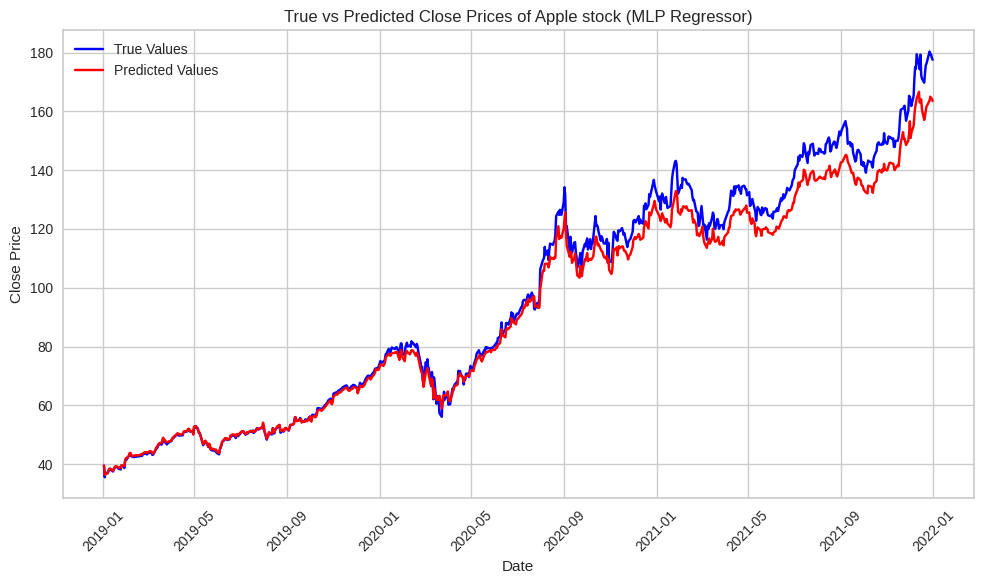

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(test_data['Date'], y_test, label='True Values', color='blue', markersize=4)
plt.plot(test_data['Date'], y_pred_mlp, label='Predicted Values', color='red', linestyle='-', markersize=4)

plt.title('True vs Predicted Close Prices of Apple stock (MLP Regressor)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

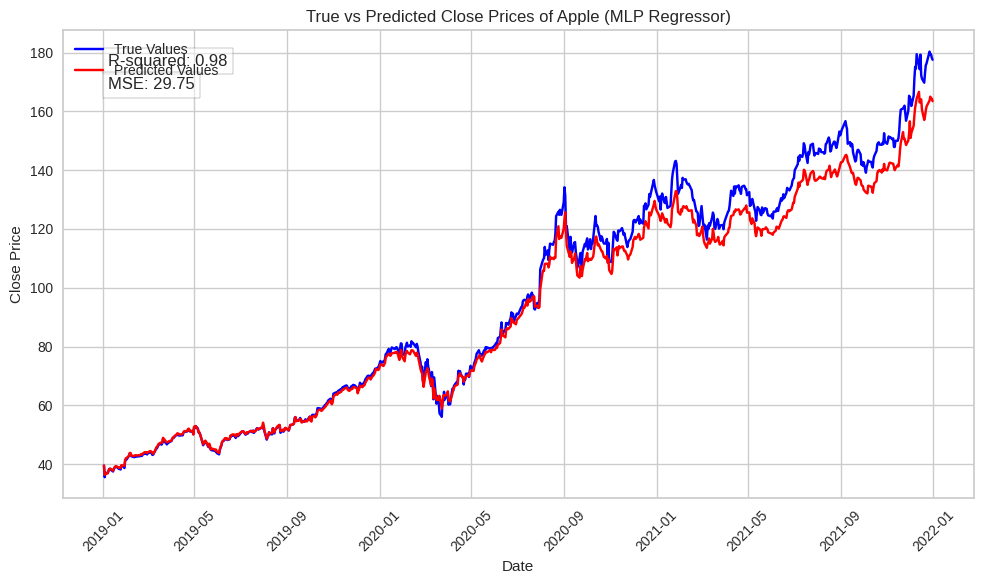

In [ ]:
# Calculate R-squared value
mlp_r2 = r2_score(y_test, y_pred_mlp)

# Plot the true vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(test_data['Date'], y_test, label='True Values', color='blue', markersize=4)
plt.plot(test_data['Date'], y_pred_mlp, label='Predicted Values', color='red', linestyle='-', markersize=4)

# Annotate R-squared and MSE on the plot
plt.text(0.05, 0.95, f'R-squared: {mlp_r2:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
plt.text(0.05, 0.90, f'MSE: {mlp_mse:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

# Titles and labels
plt.title('True vs Predicted Close Prices of Apple (MLP Regressor)')
plt.xlabel('Date')
plt.ylabel('Close Price')

# Show the legend
plt.legend()

# Grid and rotate xticks for better readability
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


### Plotting true vs predicted values of Microsoft stocks to see how the model performs.

MLP Regressor MSE: 208.06274670143287


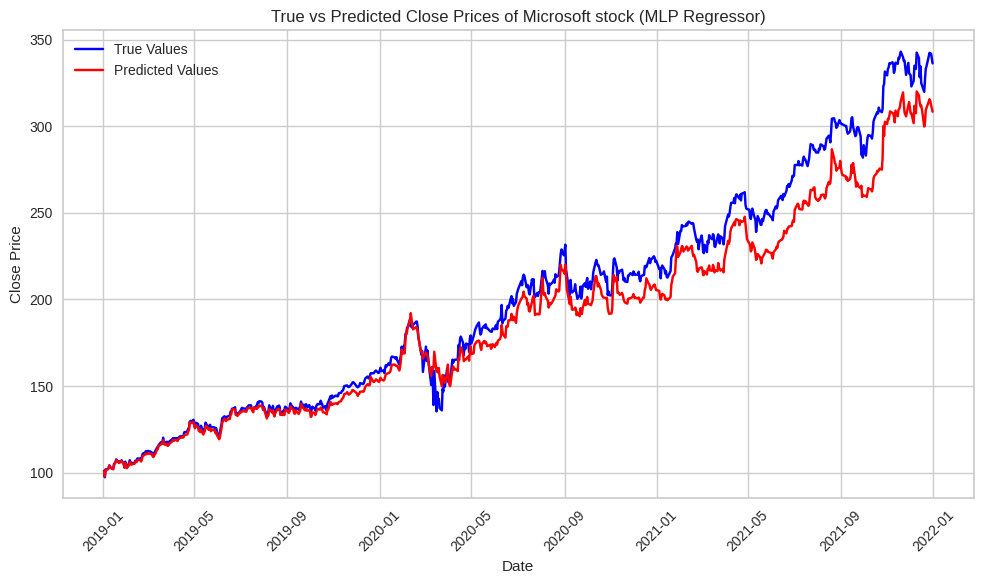

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/Milestone II/Top_10_NASDAQ.csv")
df1['Date'] = pd.to_datetime(df1['Date'])
# Filter data for the company with ticker_numeric = 28
df_company = df1[df1['Ticker_numeric'] == 28]

train_start_date = pd.to_datetime('2005-01-01')
train_end_date = pd.to_datetime('2019-01-01')

test_start_date = pd.to_datetime('2019-01-01')
test_end_date = pd.to_datetime('2022-01-01')

train_data = df_company[(df_company['Date'] >= train_start_date) & (df_company['Date'] < train_end_date)]
test_data = df_company[(df_company['Date'] >= test_start_date) & (df_company['Date'] < test_end_date)]

# Define the features (e.g., Open, High, Low) and target (e.g., Close)
X_train = train_data[['Open', 'High', 'Low', 'Volume',
       'garman_klass_vol', 'rsi', 'bb_low', 'bb_mid', 'bb_high', 'atr', 'macd',
       'dollar_volume', 'Ticker_numeric', 'Company_Name_numeric']]  # Example features
y_train = train_data['Close']  # Target variable for training

X_test = test_data[['Open', 'High', 'Low', 'Volume',
       'garman_klass_vol', 'rsi', 'bb_low', 'bb_mid', 'bb_high', 'atr', 'macd',
       'dollar_volume', 'Ticker_numeric', 'Company_Name_numeric']]  # Example features
y_test = test_data['Close']  # Target variable for testing

# Function to process datetime and string columns
def preprocess_data(X):
    # Convert datetime columns to timestamps
    for col in X.columns:
        if pd.api.types.is_datetime64_any_dtype(X[col]):
            X[col] = X[col].apply(lambda x: x.timestamp())  # Convert datetime to timestamp

    # One-hot encode categorical string columns
    X = pd.get_dummies(X, drop_first=True)
    return X

# Preprocess both training and testing datasets
X_train = preprocess_data(X_train)
X_test = preprocess_data(X_test)

# Ensure columns align between train and test sets
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# MLP Regressor using scikit-learn
mlp_regressor = MLPRegressor(hidden_layer_sizes=(100, 100), activation='relu', solver='adam', max_iter=1000, random_state=42)
mlp_regressor.fit(X_train_scaled, y_train)

# Predict and evaluate the model
y_pred_mlp = mlp_regressor.predict(X_test_scaled)
mlp_mse = mean_squared_error(y_test, y_pred_mlp)
print(f'MLP Regressor MSE: {mlp_mse}')

plt.figure(figsize=(10, 6))
plt.plot(test_data['Date'], y_test, label='True Values', color='blue', markersize=4)
plt.plot(test_data['Date'], y_pred_mlp, label='Predicted Values', color='red', linestyle='-', markersize=4)

plt.title('True vs Predicted Close Prices of Microsoft stock (MLP Regressor)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

## Failure analyis of Apple and Microsoft stocks during COVID-19 pandemic

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import datetime

# Load stock data
df1 = pd.read_csv("/content/drive/MyDrive/Milestone II/Top_10_NASDAQ.csv")
df1['Date'] = pd.to_datetime(df1['Date'])

# Create a COVID-19 indicator variable (e.g., from March 2020 to Dec 2021)
covid_start = pd.to_datetime('2020-03-01')
covid_end = pd.to_datetime('2021-12-31')
df1['COVID_Impact'] = df1['Date'].apply(lambda x: 1 if covid_start <= x <= covid_end else 0)

# Filter data for the company with ticker_numeric = 0
df_company = df1[df1['Ticker_numeric'] == 0]

# Define training and testing periods
train_start_date = pd.to_datetime('2005-01-01')
train_end_date = pd.to_datetime('2019-01-01')
test_start_date = pd.to_datetime('2019-01-01')
test_end_date = pd.to_datetime('2022-01-01')

# Split data into training and testing sets
train_data = df_company[(df_company['Date'] >= train_start_date) & (df_company['Date'] < train_end_date)]
test_data = df_company[(df_company['Date'] >= test_start_date) & (df_company['Date'] < test_end_date)]

# Define features (including the COVID-19 indicator) and target variable
features = ['Open', 'High', 'Low', 'Volume', 'garman_klass_vol', 'rsi', 'bb_low', 'bb_mid',
            'bb_high', 'atr', 'macd', 'dollar_volume',
            'COVID_Impact']  # Added 'COVID_Impact' as a feature

X_train = train_data[features]
y_train = train_data['Close']
X_test = test_data[features]
y_test = test_data['Close']

# Function to process datetime and string columns
def preprocess_data(X):
    # Convert datetime columns to timestamps
    for col in X.columns:
        if pd.api.types.is_datetime64_any_dtype(X[col]):
            X[col] = X[col].apply(lambda x: x.timestamp())  # Convert datetime to timestamp

    # One-hot encode categorical string columns
    X = pd.get_dummies(X, drop_first=True)
    return X

# Preprocess both training and testing datasets
X_train = preprocess_data(X_train)
X_test = preprocess_data(X_test)

# Ensure columns align between train and test sets
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# MLP Regressor using scikit-learn
mlp_regressor = MLPRegressor(hidden_layer_sizes=(100, 100), activation='relu', solver='adam', max_iter=1000, random_state=42)
mlp_regressor.fit(X_train_scaled, y_train)

# Predict and evaluate the model
y_pred_mlp = mlp_regressor.predict(X_test_scaled)
mlp_mse = mean_squared_error(y_test, y_pred_mlp)
print(f'MLP Regressor MSE: {mlp_mse}')

# Additional analysis: Calculate predictions during COVID-19 period
test_data['Predicted_Close'] = y_pred_mlp
covid_period = test_data[(test_data['COVID_Impact'] == 1)]
covid_mse = mean_squared_error(covid_period['Close'], covid_period['Predicted_Close'])
print(f'MLP Regressor MSE during COVID-19: {covid_mse}')


MLP Regressor MSE: 25.83787662402923
MLP Regressor MSE during COVID-19: 41.35105892334765


In [ ]:
# Load stock data of Microsoft
df1 = pd.read_csv("/content/drive/MyDrive/Milestone II/Top_10_NASDAQ.csv")
df1['Date'] = pd.to_datetime(df1['Date'])

# Create a COVID-19 indicator variable (e.g., from March 2020 to Dec 2021)
covid_start = pd.to_datetime('2020-03-01')
covid_end = pd.to_datetime('2021-12-31')
df1['COVID_Impact'] = df1['Date'].apply(lambda x: 1 if covid_start <= x <= covid_end else 0)

# Filter data for the company with ticker_numeric = 28 (Microsoft)
df_company = df1[df1['Ticker_numeric'] == 28]

# Define training and testing periods
train_start_date = pd.to_datetime('2005-01-01')
train_end_date = pd.to_datetime('2019-01-01')
test_start_date = pd.to_datetime('2019-01-01')
test_end_date = pd.to_datetime('2022-01-01')

# Split data into training and testing sets
train_data = df_company[(df_company['Date'] >= train_start_date) & (df_company['Date'] < train_end_date)]
test_data = df_company[(df_company['Date'] >= test_start_date) & (df_company['Date'] < test_end_date)]

# Define features (including the COVID-19 indicator) and target variable
features = ['Open', 'High', 'Low', 'Volume', 'garman_klass_vol', 'rsi', 'bb_low', 'bb_mid',
            'bb_high', 'atr', 'macd', 'dollar_volume',
            'COVID_Impact']  # Added 'COVID_Impact' as a feature

X_train = train_data[features]
y_train = train_data['Close']
X_test = test_data[features]
y_test = test_data['Close']

# Function to process datetime and string columns
def preprocess_data(X):
    # Convert datetime columns to timestamps
    for col in X.columns:
        if pd.api.types.is_datetime64_any_dtype(X[col]):
            X[col] = X[col].apply(lambda x: x.timestamp())  # Convert datetime to timestamp

    # One-hot encode categorical string columns
    X = pd.get_dummies(X, drop_first=True)
    return X

# Preprocess both training and testing datasets
X_train = preprocess_data(X_train)
X_test = preprocess_data(X_test)

# Ensure columns align between train and test sets
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# MLP Regressor using scikit-learn
mlp_regressor = MLPRegressor(hidden_layer_sizes=(100, 100), activation='relu', solver='adam', max_iter=1000, random_state=42)
mlp_regressor.fit(X_train_scaled, y_train)

# Predict and evaluate the model
y_pred_mlp = mlp_regressor.predict(X_test_scaled)
mlp_mse = mean_squared_error(y_test, y_pred_mlp)
print(f'MLP Regressor MSE: {mlp_mse}')

# Additional analysis: Calculate predictions during COVID-19 period for Microsoft
test_data['Predicted_Close'] = y_pred_mlp
covid_period = test_data[(test_data['COVID_Impact'] == 1)]
covid_mse = mean_squared_error(covid_period['Close'], covid_period['Predicted_Close'])
print(f'MLP Regressor MSE during COVID-19: {covid_mse}')


MLP Regressor MSE: 158.90906497462487
MLP Regressor MSE during COVID-19: 252.57700457270778
